In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

from ex_01_read_data import get_welding_data
from ex_03_feature_extraction import extract_features

In [3]:
data_path = Path("data/Welding/data.csv")
plot_path = Path("plots/ex_03")
plot_path.mkdir(parents=True, exist_ok=True)

## Exercise 3.3: Feature Exploration with Pairplots

In this exercise, you will create a seaborn pairplot to visualize relationships between the features extracted from the welding data. 

In [4]:
n_samples = 1_000
data, labels, _ = get_welding_data(data_path, n_samples=n_samples)
features = extract_features(data, labels)
features.head()

,volt_mean,volt_std,volt_max,volt_min,volt_skew,volt_kurt,volt_median,volt_range,volt_energy,volt_dominant_freq,...,curr_std,curr_max,curr_min,curr_skew,curr_kurt,curr_median,curr_range,curr_energy,curr_dominant_freq,label
0,164.303438,179.023444,528.793620,39.097315,1.169668,-0.280752,50.933685,489.696305,1.180900e+07,5.0,...,4.471766,30.397353,16.541916,1.190225,-0.161557,17.457367,13.855437,85304.057900,5.0,1
1,161.812742,175.749109,527.602672,28.785536,1.156714,-0.189735,62.273831,498.817136,1.141422e+07,5.0,...,3.960046,28.978433,11.957159,0.794923,-0.621381,18.980324,17.021274,90466.957319,5.0,1
2,99.038302,121.544304,411.982501,28.907297,1.717333,1.529918,30.430537,383.075203,4.916321e+06,5.0,...,5.322735,30.188526,3.401820,-0.213408,1.698590,16.357353,26.786705,65802.255916,25.0,1
3,156.469293,177.452450,523.101912,36.658340,1.213663,-0.196099,47.327999,486.443571,1.119440e+07,5.0,...,5.143836,29.480338,5.451910,0.112368,-0.162598,17.293120,24.028428,85960.539102,5.0,1
4,168.486261,186.571305,541.969941,36.783854,1.119550,-0.406267,47.154555,505.186087,1.263929e+07,5.0,...,4.788410,31.254771,11.230214,0.706220,-0.920221,19.540354,20.024558,103998.616536,5.0,0


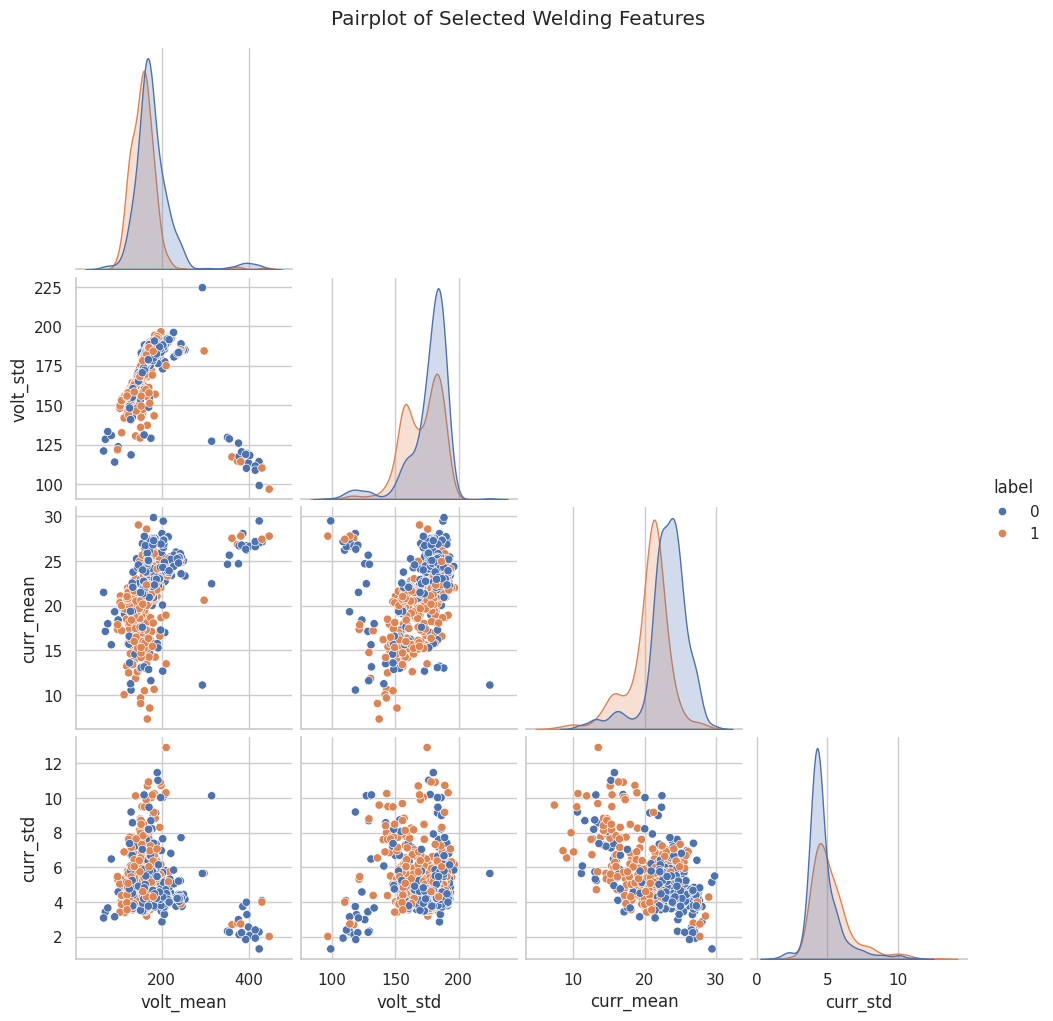

In [5]:
# Choosing features
selected_features = [
    "volt_mean", "volt_std", "curr_mean", "curr_std", "label"
]

# PCofigure plot
sns.set(style="whitegrid", context="notebook")
pairplot = sns.pairplot(features[selected_features], hue="label", diag_kind="kde", corner=True)

# Save
pairplot.fig.suptitle("Pairplot of Selected Welding Features", y=1.02)
pairplot.savefig(plot_path / "feature_pairplot.png")
plt.show()


## Exercise 3.4: Describe Your Feature Selection

Based on the pairplot visualization from Exercise 3.1, provide a detailed analysis of your feature selection:

1. Which features appear most effective at separating the quality classes?
2. Are there features that show strong correlation with each other? Would it make sense to remove any redundant features?
3. Explain the physical significance of your selected features in the context of welding quality.
4. If you were to select a subset of 5 most important features for classifying welding quality, which would you choose and why?
5. Discuss any patterns or insights you discovered in the data visualization that might help with building a classification model.
